In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pynest.rkg as rkg

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c922541f0>)

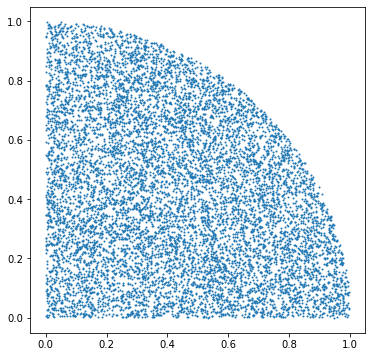

In [9]:
# sampling unifromly n times from first orthant of unit d-ball
arr = rkg.sample_unif_ball_orthant(n=10000, d=2)
plt.subplots(figsize=(6, 6))
plt.scatter(arr[:, 0], arr[:, 1], s=1)

In [24]:
# create data

n = 1500
d = 7

x = rkg.sample_unif_ball_orthant(n, d)
y = rkg.sample_unif_ball_orthant(n, d)

In [25]:
# sample

p = rkg.get_prob_mat(x)
q = rkg.get_prob_mat(y)

a = rkg.sample_adj_mat(p)
b = rkg.sample_adj_mat(q)

In [26]:
# get test statistic 
t = rkg.get_test_stat(a, b, d)
t

0.0770641089900177

<Figure size 1080x1080 with 0 Axes>

171.0

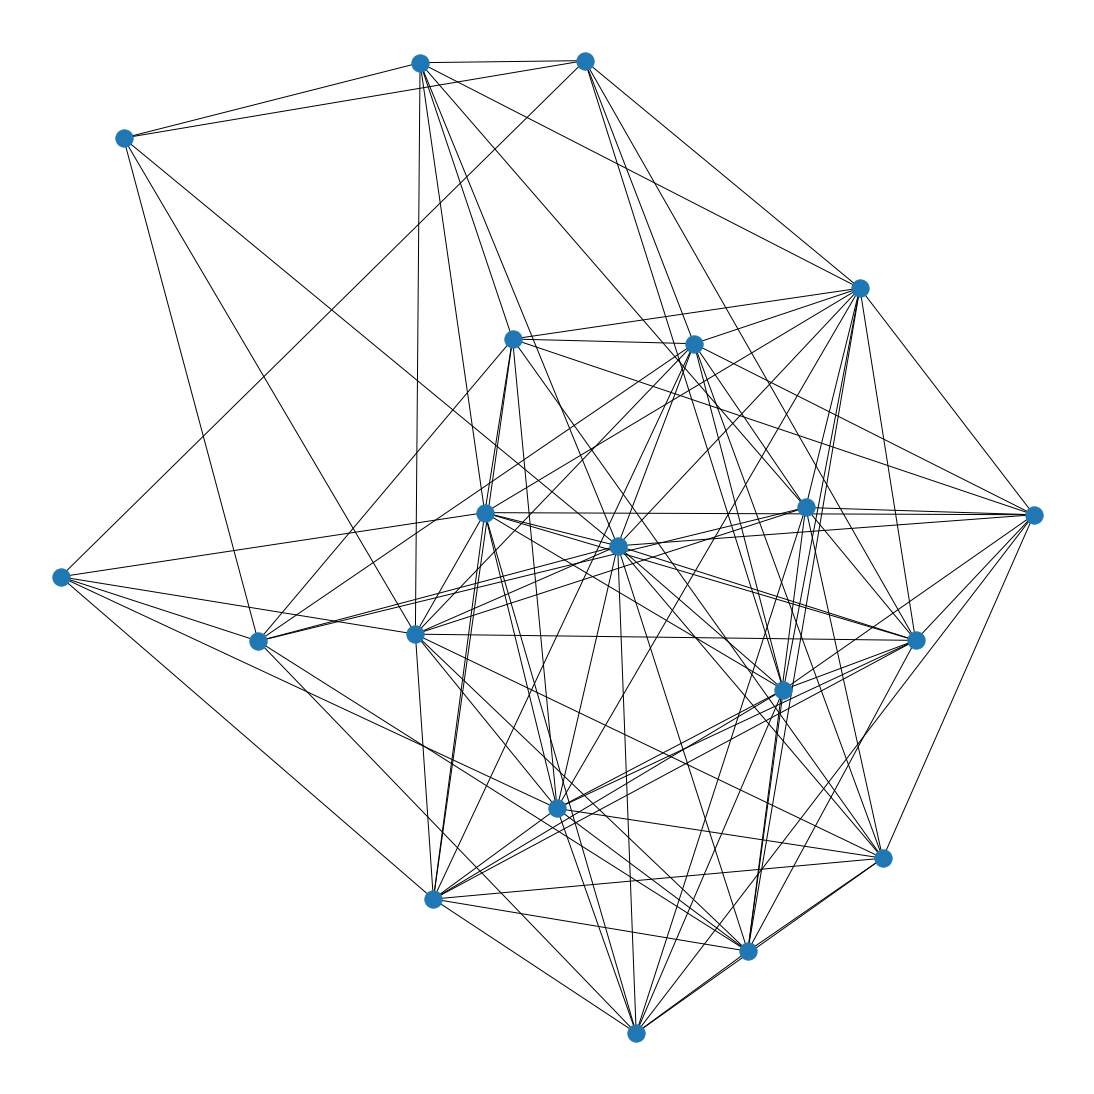

In [320]:

g = nx.convert_matrix.from_numpy_matrix(a[:20, :20])
figure(figsize=(15,15))
nx.draw(g)
t = nx.triangles(g)
sum(t.values()) / 3

In [30]:
n = 100
d = 2
x = unif_ball_orthant(n, d)
p = get_prob_mat(x)

ind = np.triu_indices(n, k=1)
p_vals = p[ind]

np.quantile(p_vals, [.25, .5, .75])

array([0.19949245, 0.33181469, 0.53796812])

In [ ]:
# # sample n points uniformly from first orthant of the unit d-ball
# def unif_ball_orthant(n=1, d=1):
#     count = 0
#     sample_list = []
#     while(count < n):
#         y = np.random.uniform(size=d)
#         if np.linalg.norm(y, ord=2) <= 1:
#             sample_list.append(y)
#             count = count + 1
        
#     x = np.array(sample_list)
    
#     return x

# # get probability matrix
# def get_prob_mat(x):
#     p = x @ x.transpose()
    
#     return p

# # sample adjacency matrix
# def sample_adj_mat(p):
#     n = p.shape[0]
#     ind = np.triu_indices(n, k=1)
#     a_vals = np.random.binomial(1, p[ind])
#     a = np.zeros((n,n))
#     a[ind] = a_vals
#     a = a.transpose()
#     a[ind] = a_vals
    
#     return a

# # get spectral decomposition of self-adjoint M with eigenvals decreasing
# def get_sd(M):
#     lam, u = np.linalg.eig(M)
#     ind = np.argsort(lam)[::-1]
#     lam = lam[ind]
#     u = u[:, ind]
    
#     return lam, u
    

# # get singular value decomposition of M with singular vals decreasing 
# def get_svd(m, compute_uv=True):
#     if compute_uv == True:
#         u, s, vt = np.linalg.svd(m)
#         ind = np.argsort(s)[::-1]
#         u = u[:, ind]
#         s = s[ind]
#         vt = vt[ind, :]
    
#         return u, s, vt
#     else:
#         s = np.linalg.svd(m, compute_uv=False)
#         ind = np.argsort(s)[::-1]
#         s = s[ind]
        
#         return s

# # calculate delta(M)
# def get_delta(m):
#     row_sums = np.sum(m, axis=1)
#     max_row_sum = np.max(row_sums)
    
#     return max_row_sum


# # calculate gamma(M, d) with d in [0, ..., min(m,n) - 1] where m, n are the number of rows, cols 
# def get_gamma(m, d):
#     s = get_svd(m, compute_uv=False)
#     assert d < len(s) - 1
#     sd = s[d]
#     sdp = s[d+1]
#     delta = get_delta(m)
#     gamma = (sd - sdp) / delta
    
#     return gamma
    
# # get argmin of orthogonal matrix procrustes problem: find orthogonal w s.t. |xw - y| is minimal
# def get_opt_translate(x, y):
#     u, s, vt = get_svd(x.transpose() @ y)
#     w = u @ vt 
    
#     return w

# # get adjacency spectral embedding
# def get_adj_spec_emb(a, d):
#     a_sq = a.transpose() @ a
#     lam_sq, u = get_sd(a_sq)
    
#     lam_hat = (lam_sq[:d])**(1/4)
#     u_hat = u[:, :d]
#     x_hat = u_hat @ np.diag(lam_hat)
    
#     return x_hat

# def get_test_stat(a, b, d):
#     x_hat = get_adj_spec_emb(a, d)
#     y_hat = get_adj_spec_emb(b, d)
#     w = get_opt_translate(x_hat, y_hat)
    
#     gam_a = get_gamma(a, d)
#     gam_b = get_gamma(b, d)
#     sa = np.sqrt(d / gam_a)
#     sb = np.sqrt(d / gam_b)
    
#     num = np.linalg.norm(x_hat @ w - y, ord='fro')
#     denom = sa + sb
    
#     t = num / denom
    
#     return t